In [1]:
%pylab inline
from sklearn.naive_bayes import GaussianNB
from distribuciones import paralelo, diagonal, espirales_anidadas
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from random import sample
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from random import sample

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def NBfunction(bines,x_train,y_train,x_val,y_val,x_test,y_test):
    
    error_train = []; error_val = []; error_test = []
    
    for bins in bines:
        best_bins = -99
        best_accuracy = -99
    # convierto variables
    
        discretizador = KBinsDiscretizer(n_bins = bins, encode='ordinal',strategy='uniform')
        discretizador.fit(x_train)
        x_train_disc = discretizador.transform(x_train)
        x_val_disc   = discretizador.transform(x_val)
        x_test_disc  = discretizador.transform(x_test)
    
    # entreno el clasificador
    
        clf = CategoricalNB(min_categories=bins)
        clf.fit(x_train_disc,y_train)
        
    # compruebo error
    
        prediccion_training = clf.predict(x_train_disc)
        correctos, = np.where(prediccion_training == y_train)
        accuracy_train = len(correctos)/len(y_train)
        
        prediccion_validation = clf.predict(x_val_disc)
        correctos, = np.where(prediccion_validation == y_val)
        accuracy_val = len(correctos)/len(y_val)
        
        prediccion_test = clf.predict(x_test_disc)
        correctos, = np.where(prediccion_test == y_test)
        accuracy_test = len(correctos)/len(y_test)
        
        if accuracy_train > best_accuracy:
            best_accuracy = accuracy_train
            best_clf = clf
            best_bins = bins
            
        error_train.append(1-accuracy_train)
        error_val.append(1-accuracy_val)
        error_test.append(1-accuracy_test)
        
    return error_train, error_val, error_test, best_clf, best_bins

# Dos elipses

In [3]:
df = pd.read_csv('../tp2/dos_elipses.data')
df.columns = ['x','y','clase']

x = df.iloc[:,0]
y = df.iloc[:,1]
clase = df.iloc[:,2]


ndata = 500
ntrain = 400
nvalid = 100
ntest = 2000

# selecciono 500 datos para trabajar

seleccion = sample(list(np.arange(len(x))),ndata)
xdata = x[seleccion]
ydata = y[seleccion]

# separo en train y validation

train_mask = sample(list(np.arange(ndata)),ntrain)
valid_mask = np.delete(np.arange(ndata),train_mask)

r_train = df.iloc[train_mask,:2]
c_train = df.iloc[train_mask,2]

r_valid = df.iloc[valid_mask,:2]
c_valid = df.iloc[valid_mask,2]

df_test = pd.read_csv('../tp2/dos_elipses.test')
df_test.columns = ['x','y','clase']

r_test = df_test.iloc[:,:2]
c_test = df_test.iloc[:,2]

In [10]:
bines = np.arange(2,200)

error_train, error_val, error_test, best_clf, best_bins = NBfunction(bines,r_train,c_train,r_valid,c_valid,r_test,c_test)

Text(0.5, 0, 'bines')

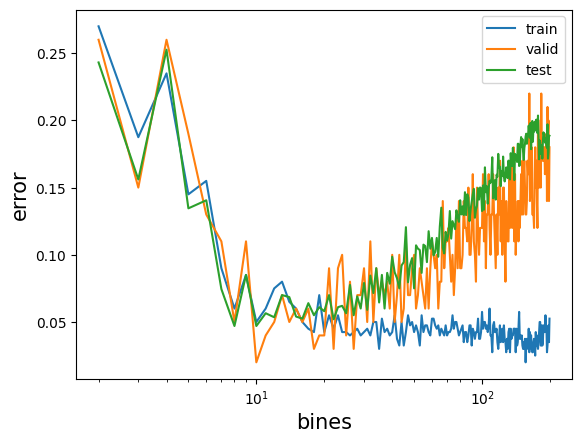

In [11]:
plt.plot(bines,error_train,label='train')
plt.plot(bines,error_val,label='valid')
plt.plot(bines,error_test,label='test')
plt.legend()
plt.semilogx()
plt.ylabel('error',size=15)
plt.xlabel('bines',size=15)

# ESPIRALES ANIDADAS

In [18]:
ndata = 400
nvalid = 100
ntest = 2000

df = espirales_anidadas(ndata).drop(['r','tita'],axis=1)
ydata = df['clases']
xdata = df.drop(['clases'],axis = 1)

df = espirales_anidadas(nvalid).drop(['r','tita'],axis=1)
yval = df['clases']
xval = df.drop(['clases'],axis = 1)

df = espirales_anidadas(ntest).drop(['r','tita'],axis=1)
ytest = df['clases']
xtest = df.drop(['clases'],axis = 1)

In [19]:
error_train, error_val, error_test, best_clf, best_bins = NBfunction(bines,xdata,ydata,xval,yval,xtest,ytest)

Text(0.5, 0, 'bines')

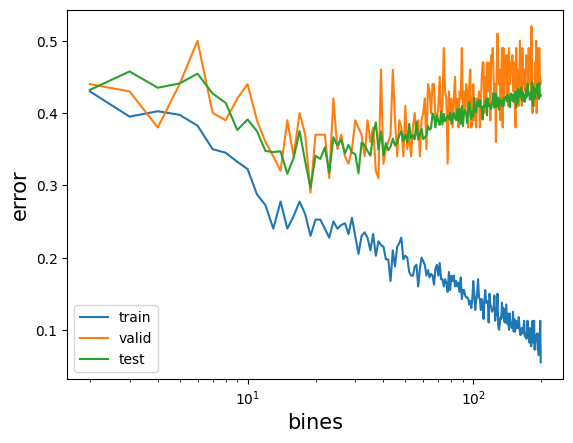

In [20]:
plt.plot(bines,error_train,label='train')
plt.plot(bines,error_val,label='valid')
plt.plot(bines,error_test,label='test')
plt.legend()
plt.semilogx()
plt.ylabel('error',size=15)
plt.xlabel('bines',size=15)